In [ ]:
import os, glob, zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
!wget -nc https://archive.ics.uci.edu/static/public/779/harth.zip
!ls -lh harth.zip


--2026-02-01 18:52:54--  https://archive.ics.uci.edu/static/public/779/harth.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘harth.zip’

harth.zip               [           <=>      ] 296.40M  63.7MB/s    in 4.5s    

2026-02-01 18:52:59 (65.6 MB/s) - ‘harth.zip’ saved [310795012]

-rw-r--r-- 1 root root 297M Feb  1 18:52 harth.zip


In [ ]:
os.makedirs("harth", exist_ok=True)

with zipfile.ZipFile("harth.zip", "r") as z:
    z.extractall("harth")

csv_files = glob.glob("harth/**/*.csv", recursive=True)
print("CSV trovati:", len(csv_files))
csv_files[:5]


CSV trovati: 22


['harth/harth/S021.csv',
 'harth/harth/S013.csv',
 'harth/harth/S022.csv',
 'harth/harth/S028.csv',
 'harth/harth/S029.csv']

In [ ]:
from collections import Counter

SR = 50  # Hz (dato dal dataset)

n_subjects = len(csv_files)
total_rows = 0

for fp in csv_files:
    df = pd.read_csv(fp, usecols=["label"])
    total_rows += len(df)

print("Numero soggetti:", n_subjects)
print("Totale campioni (righe):", total_rows)
print("Sampling rate:", SR, "Hz")
print("Durata totale (min):", total_rows / SR / 60)


Numero soggetti: 22
Totale campioni (righe): 6461328
Sampling rate: 50 Hz
Durata totale (min): 2153.776


In [ ]:
# Check veloce su alcuni file
for fp in csv_files[:5]:
    df = pd.read_csv(fp)
    miss = int(df.isna().sum().sum())
    print(os.path.basename(fp), "missing:", miss)

# Se vuoi check totale (più lento) metti True
CHECK_ALL = False
if CHECK_ALL:
    total_miss = 0
    for fp in csv_files:
        df = pd.read_csv(fp)
        total_miss += int(df.isna().sum().sum())
    print("Missing t:", total_miss)


S021.csv missing: 0
S013.csv missing: 0
S022.csv missing: 0
S028.csv missing: 0
S029.csv missing: 0


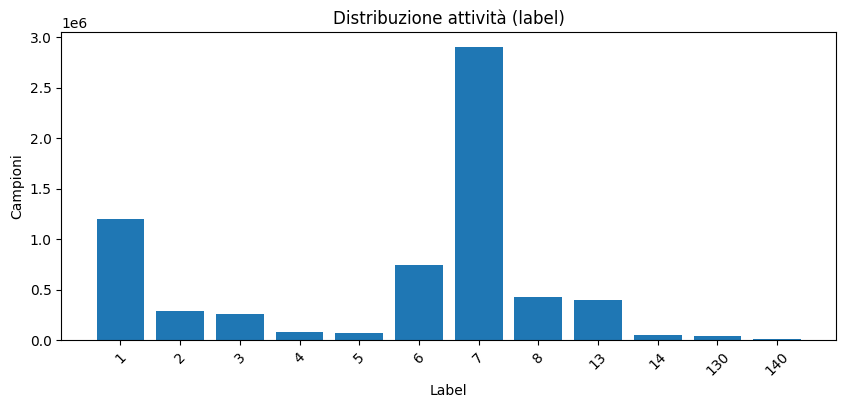

{1: 1197155,
 2: 291356,
 3: 254839,
 4: 76217,
 5: 67253,
 6: 743480,
 7: 2902703,
 8: 428898,
 13: 393963,
 14: 55814,
 130: 41785,
 140: 7865}

In [ ]:
label_counter = Counter()

for fp in csv_files:
    df = pd.read_csv(fp, usecols=["label"])
    label_counter.update(df["label"].astype(int).tolist())

labels = sorted(label_counter.keys())
counts = [label_counter[l] for l in labels]

plt.figure(figsize=(10,4))
plt.bar([str(l) for l in labels], counts)
plt.title("Distribuzione attività (label)")
plt.xlabel("Label")
plt.ylabel("Campioni")
plt.xticks(rotation=45)
plt.show()

dict(sorted(label_counter.items()))


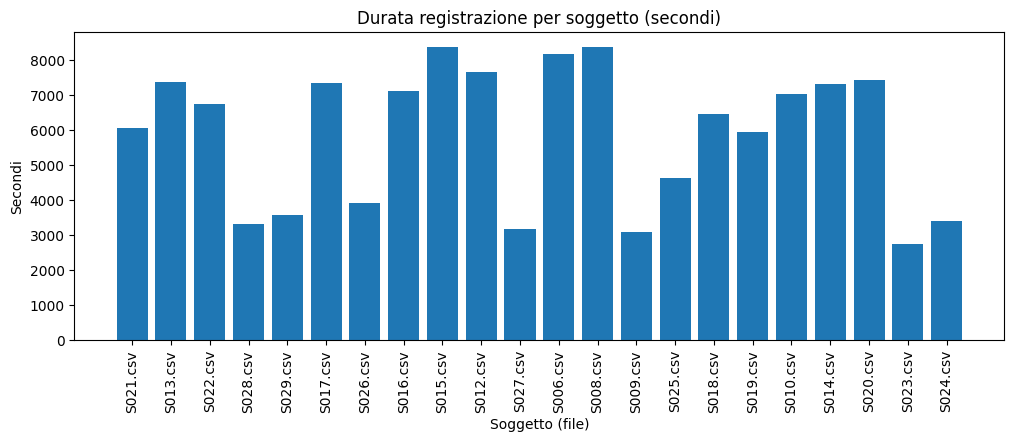

Min sec: 2752.92 Max sec: 8379.78 Media sec: 5873.9345454545455


In [ ]:
durations_sec = {}

for fp in csv_files:
    # leggiamo solo una colonna per velocità
    n = len(pd.read_csv(fp, usecols=["label"]))
    durations_sec[os.path.basename(fp)] = n / SR

plt.figure(figsize=(12,4))
plt.bar(durations_sec.keys(), durations_sec.values())
plt.title("Durata registrazione per soggetto (secondi)")
plt.xlabel("Soggetto (file)")
plt.ylabel("Secondi")
plt.xticks(rotation=90)
plt.show()

print("Min sec:", min(durations_sec.values()),
      "Max sec:", max(durations_sec.values()),
      "Media sec:", sum(durations_sec.values())/len(durations_sec))


In [ ]:
sensor_cols = ["back_x","back_y","back_z","thigh_x","thigh_y","thigh_z"]

fp = csv_files[0]
df0 = pd.read_csv(fp, usecols=sensor_cols + ["label"])

print("Esempio soggetto:", os.path.basename(fp))
display(df0.describe())


Esempio soggetto: S021.csv


,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
count,302247.000000,302247.000000,302247.000000,302247.000000,302247.000000,302247.000000,302247.000000
mean,-0.929234,0.004081,-0.079903,-0.467381,0.150108,0.483539,5.860634
std,0.320802,0.243616,0.301392,0.506164,0.303757,0.624394,2.411139
min,-4.800855,-2.195478,-1.382702,-6.838976,-3.412234,-3.335828,1.000000
25%,-1.031566,-0.034414,-0.218272,-0.917711,0.044791,-0.163295,6.000000
50%,-1.018402,0.001533,-0.086723,-0.291162,0.144440,0.901996,7.000000
75%,-0.983735,0.043557,0.079674,-0.154519,0.262642,0.947983,7.000000
max,1.253294,2.747783,2.469329,2.279510,4.632514,3.987468,14.000000


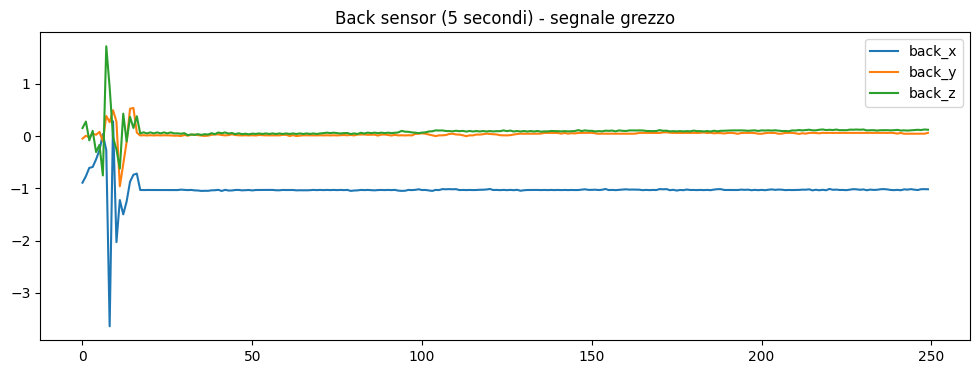

Label presenti nei primi 5 secondi: [6]


In [ ]:
fp = csv_files[0]
df = pd.read_csv(fp)

segment = df.iloc[:250]  # 5 sec @ 50Hz

plt.figure(figsize=(12,4))
plt.plot(segment["back_x"], label="back_x")
plt.plot(segment["back_y"], label="back_y")
plt.plot(segment["back_z"], label="back_z")
plt.title("Back sensor (5 secondi) - segnale grezzo")
plt.legend()
plt.show()



print("Label presenti nei primi 5 secondi:", segment["label"].unique())


/tmp/ipython-input-2880034285.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_box, labels=[str(l) for l in labs])


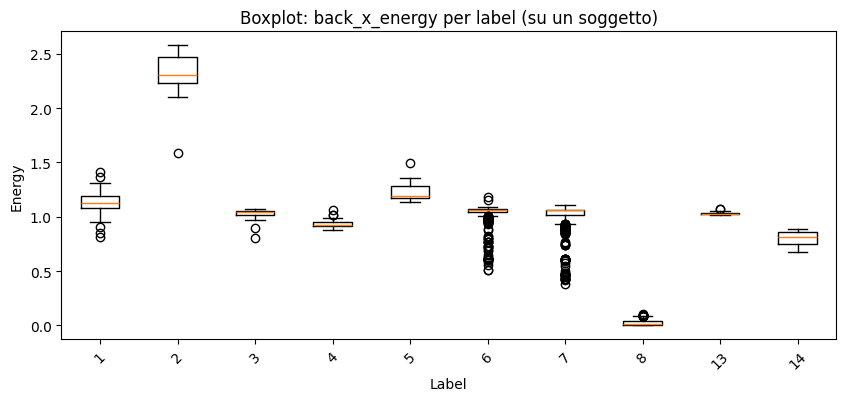

In [ ]:
# energia = mean(x^2) su finestre piccole per visualizzare differenze tra attività
fp = csv_files[0]
df = pd.read_csv(fp, usecols=sensor_cols + ["label"])

WIN = 100
STEP = 100  # non sovrapposte per EDA

rows = []
for start in range(0, len(df) - WIN + 1, STEP):
    w = df.iloc[start:start+WIN]
    if w["label"].nunique() != 1:
        continue
    lab = int(w["label"].iloc[0])
    bx = w["back_x"].to_numpy()
    rows.append({
        "label": lab,
        "back_x_energy": float(np.mean(bx**2)),
    })

eda_feat = pd.DataFrame(rows)

plt.figure(figsize=(10,4))
labs = sorted(eda_feat["label"].unique())
data_box = [eda_feat.loc[eda_feat["label"]==l, "back_x_energy"].values for l in labs]
plt.boxplot(data_box, labels=[str(l) for l in labs])
plt.title("Boxplot: back_x_energy per label (su un soggetto)")
plt.xlabel("Label")
plt.ylabel("Energy")
plt.xticks(rotation=45)
plt.show()


In [ ]:
SENSOR_COLS = ["back_x","back_y","back_z","thigh_x","thigh_y","thigh_z"]

WINDOW = 100   # 2 secondi
STEP   = 50    # 1 secondo (overlap 50%)

REMOVE_INACTIVE = True
INACTIVE = {130, 140}

def extract_features(w: pd.DataFrame) -> np.ndarray:
    feats = []
    for col in SENSOR_COLS:
        x = w[col].to_numpy(dtype=np.float32)
        feats.extend([
            float(x.mean()),
            float(x.std()),
            float(x.min()),
            float(x.max()),
            float(np.mean(x**2))  # energy
        ])
    back = w[["back_x","back_y","back_z"]].to_numpy(dtype=np.float32)
    thigh = w[["thigh_x","thigh_y","thigh_z"]].to_numpy(dtype=np.float32)
    feats.append(float(np.mean(np.abs(back).sum(axis=1))))   # back_SMA
    feats.append(float(np.mean(np.abs(thigh).sum(axis=1))))  # thigh_SMA
    return np.array(feats, dtype=np.float32)


In [ ]:
X_list, y_list, g_list = [], [], []

for fp in csv_files:
    subj = os.path.basename(fp)
    df = pd.read_csv(fp)

    # pulizia minima
    if "timestamp" in df.columns:
        df = df.drop(columns=["timestamp"])
    df["label"] = df["label"].astype(int)

    # rimozione inattive (opzionale)
    if REMOVE_INACTIVE:
        df = df[~df["label"].isin(INACTIVE)].reset_index(drop=True)

    # windowing
    n = len(df)
    for start in range(0, n - WINDOW + 1, STEP):
        w = df.iloc[start:start+WINDOW]

        # tieni solo finestre pure
        if w["label"].nunique() != 1:
            continue

        X_list.append(extract_features(w))
        y_list.append(int(w["label"].iloc[0]))
        g_list.append(subj)

X = np.vstack(X_list)
y = np.array(y_list, dtype=int)
groups = np.array(g_list)

print("X:", X.shape, "y:", y.shape, "groups:", groups.shape)
print("Classi:", np.unique(y))


X: (117404, 32) y: (117404,) groups: (117404,)
Classi: [ 1  2  3  4  5  6  7  8 13 14]


In [ ]:
from sklearn.model_selection import GroupShuffleSplit

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups=groups))

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

print("Train:", X_train.shape, "Test:", X_test.shape)
print("Soggetti train:", len(np.unique(groups[train_idx])), "| test:", len(np.unique(groups[test_idx])))


Train: (87867, 32) Test: (29537, 32)
Soggetti train: 17 | test: 5


In [ ]:
!pip install -q lightgbm

import lightgbm as lgb

gbdt = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=63,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

gbdt.fit(X_train, y_train)
y_pred = gbdt.predict(X_test)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047703 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8160
[LightGBM] [Info] Number of data points in the train set: 87867, number of used features: 32
[LightGBM] [Info] Start training from score -1.597581
[LightGBM] [Info] Start training from score -2.842475
[LightGBM] [Info] Start training from score -4.200468
[LightGBM] [Info] Start training from score -4.493988
[LightGBM] [Info] Start training from score -4.809899
[LightGBM] [Info] Start training from score -2.389283
[LightGBM] [Info] Start training from score -0.798714
[LightGBM] [Info] Start training from score -2.590726
[LightGBM] [Info] Start training from score -2.551868
[LightGBM] [Info] Start training from score -4.554868
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
label_names = {
    1:"walking", 2:"running", 3:"shuffling",
    4:"stairs_up", 5:"stairs_down",
    6:"standing", 7:"sitting", 8:"lying",
    13:"cycling_sit", 14:"cycling_stand",
    130:"cycling_sit_inactive", 140:"cycling_stand_inactive"
}


              precision    recall  f1-score   support

           1     0.9293    0.9617    0.9452      3472
           2     0.9875    0.9964    0.9920       557
           3     0.6308    0.4316    0.5125       475
           4     0.5882    0.4000    0.4762       125
           5     0.6050    0.6606    0.6316       109
           6     0.9463    0.9733    0.9596      3639
           7     0.9943    0.9973    0.9958     18281
           8     0.9990    0.9953    0.9971      1913
          13     0.9081    0.8241    0.8641       887
          14     0.5397    0.4304    0.4789        79

    accuracy                         0.9704     29537
   macro avg     0.8128    0.7671    0.7853     29537
weighted avg     0.9681    0.9704    0.9688     29537



<Figure size 1000x1000 with 0 Axes>

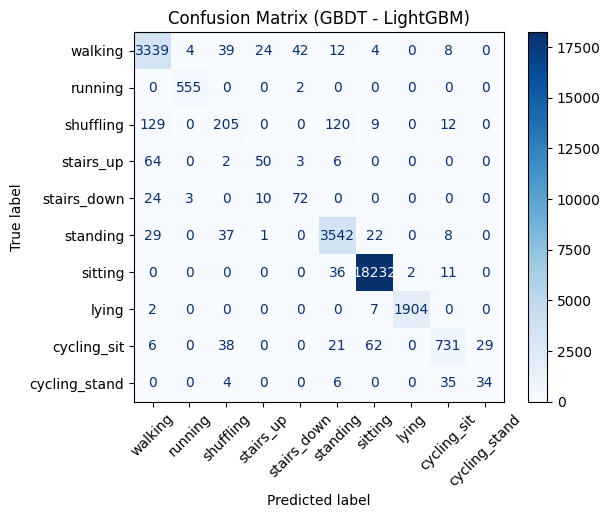

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred, digits=4))

labels_sorted = np.unique(y)
cm = confusion_matrix(y_test, y_pred, labels=labels_sorted)

plt.figure(figsize=(10,10))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=[label_names.get(l, str(l)) for l in labels_sorted]
)

disp.plot(values_format="d", cmap="Blues")
plt.title("Confusion Matrix (GBDT - LightGBM)")
plt.xticks(rotation=45)
plt.show()


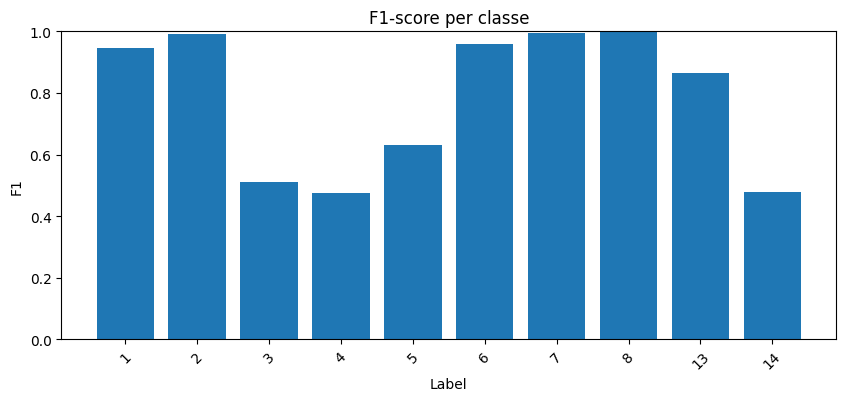

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

labels_sorted = np.unique(y)
p, r, f1, sup = precision_recall_fscore_support(y_test, y_pred, labels=labels_sorted, zero_division=0)

plt.figure(figsize=(10,4))
plt.bar(labels_sorted.astype(str), f1)
plt.title("F1-score per classe")
plt.xlabel("Label")
plt.ylabel("F1")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()


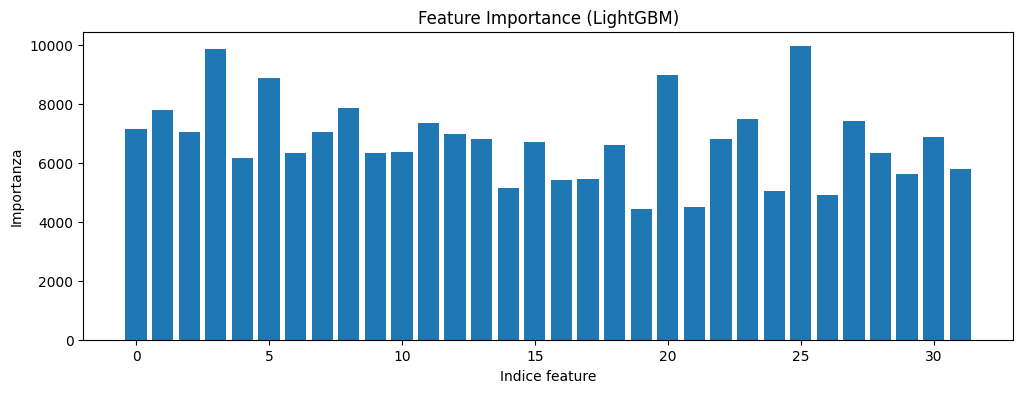

Top 10 feature indices: [25  3 20  5  8  1 23 27 11  0]


In [ ]:
importances = gbdt.feature_importances_

plt.figure(figsize=(12,4))
plt.bar(range(len(importances)), importances)
plt.title("Feature Importance (LightGBM)")
plt.xlabel("Indice feature")
plt.ylabel("Importanza")
plt.show()

print("Top 10 feature indices:", np.argsort(importances)[-10:][::-1])
